In [1]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
from sklearn.datasets import load_breast_cancer

In [12]:
cancer = load_breast_cancer()
print(type(cancer))
cancer.feature_names

<class 'sklearn.utils.Bunch'>


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

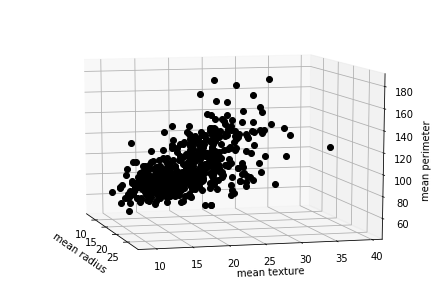

In [14]:
fig =plt.figure()
ax_3d = Axes3D(fig)
ax_3d.set_xlabel(cancer.feature_names[0])
ax_3d.set_ylabel(cancer.feature_names[1])
ax_3d.set_zlabel(cancer.feature_names[2])
ax_3d.view_init(elev=10, azim=-15)
ax_3d.plot(cancer.data[:,0], cancer.data[:,1], cancer.data[:,2], marker="o", linestyle='None', color='black')

In [31]:
sc =StandardScaler()
sc.fit(cancer.data)
X_std = sc.transform(cancer.data)
print(type(cancer.data))

<class 'numpy.ndarray'>


In [17]:
X_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [35]:
pca = PCA(n_components = 2, # 圧縮後の次元 : default None
                   copy = False, # fitやfit_transformで変換するデータを上書き : default True
                    )
pca.fit(X_std)
X_pca = pca.transform(X_std)
type(X_pca)

numpy.ndarray

In [34]:
# 属性表示
print('x pca shape: {}'.format(X_pca.shape))
print('explained_variance: {}'.format(pca.explained_variance_))
print('explained_variance: {}'.format(pca.explained_variance_ratio_))
print('平均: {}'.format(pca.mean_))
print('共分散行列: {}'.format(pca.get_covariance()))

x pca shape: (569, 2)
explained_variance: [13.30499079  5.7013746 ]
explained_variance: [0.44272026 0.18971182]
平均: [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
共分散行列: [[ 1.30339149  0.36723765  0.9101011   0.91133853  0.1720027   0.487748
   0.65560648  0.78035589  0.15424669 -0.27303781  0.71311887 -0.06241504
   0.70825606  0.76233913 -0.2126399   0.19274351  0.18932195  0.35662708
  -0.1080577  -0.05773542  0.91721359  0.3516714   0.91683402  0.90774026
   0.14777339  0.41555337  0.52494977  0.7192851   0.17126094  0.03073   ]
 [ 0.36723765  0.55

In [37]:
X_pca = pd.DataFrame(X_pca, columns = ['pc1', 'pc2'])
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns = ['target'])], axis = 1)

In [43]:
pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]
type(pca_benign)

pandas.core.frame.DataFrame

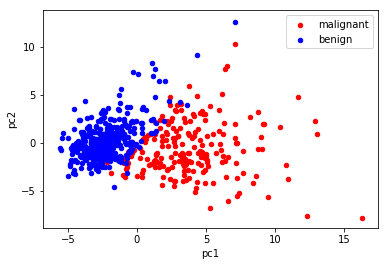

In [44]:
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant')
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax)